In [1]:
from  bped2.pedigree import Pedigree
import bped2.view as pview

In [2]:
ped = Pedigree()
ped.load('../data/ped/famRh.ped')


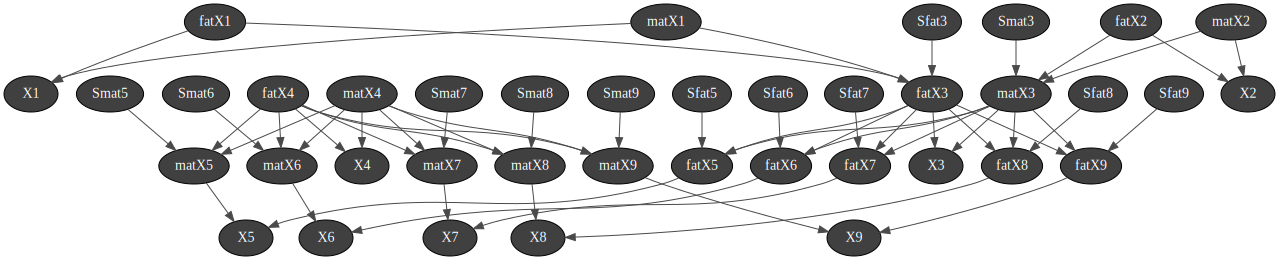

In [3]:
f = 0.05
bn1 = pview.ped_to_bn(ped,0.05)
bn1.cpt('X5')
pview.gnb.showBN(bn1, size=100)

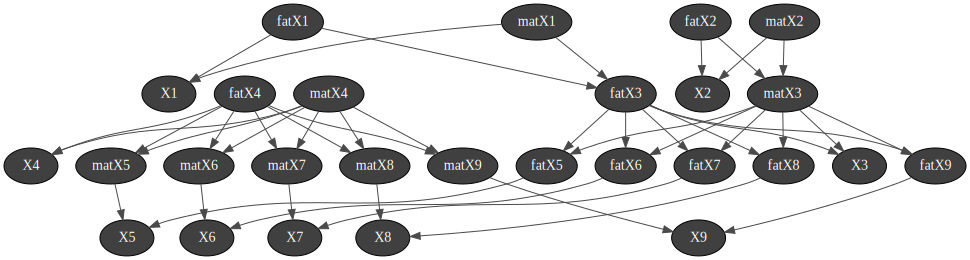

In [4]:
bn2 = pview.ped_to_bn_compact(ped,0.05)
pview.gnb.showBN(bn2, size=100)

In [4]:
pview.save_dot(bn1,'oo')

In [5]:
evidence = pview.load_evidence('../data/famRh.ev','0')
evidence

{'X1': [0.0, 1.0, 1.0, 1.0],
 'X2': [1.0, 0.0, 0.0, 0.0],
 'X3': [0.0, 1.0, 1.0, 1.0],
 'X4': [0.0, 1.0, 1.0, 1.0],
 'X5': [0.0, 1.0, 1.0, 1.0],
 'X6': [0.0, 1.0, 1.0, 1.0],
 'X7': [1.0, 0.0, 0.0, 0.0],
 'X8': [0.0, 1.0, 1.0, 1.0],
 'X9': [1.0, 0.0, 0.0, 0.0]}

In [6]:
ie1 = pview.gum.LazyPropagation(bn1)
ie1.setEvidence(evidence)
ie1.makeInference()

In [7]:
ie2 = pview.gum.LazyPropagation(bn1)
ie2.setEvidence(evidence)
ie2.makeInference()

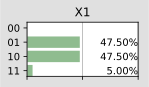

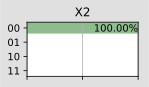

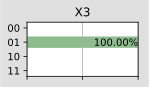

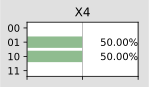

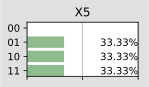

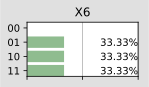

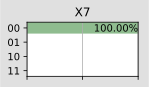

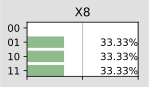

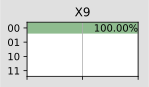

In [8]:
for i in ped.get_pedigree().keys():
    pview.gnb.showProba(ie1.posterior(f"X{i}"))

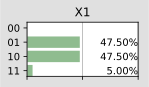

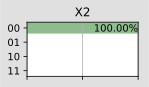

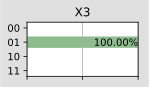

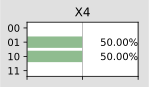

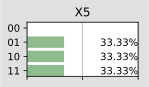

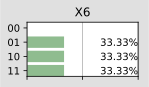

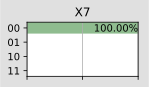

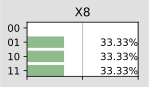

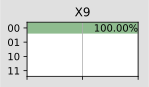

In [9]:
for i in ped.get_pedigree().keys():
    pview.gnb.showProba(ie2.posterior(f"X{i}"))


In [10]:
pview.create_out('../test.out',ped,ie1)

ValueError: ID: 0 is not in the pedigree

In [11]:
pview.load_evidence_out('../data/famRh.out','0')

{'X1': [0.0, 0.495, 0.495, 0.01],
 'X2': [1.0, 0.0, 0.0, 0.0],
 'X3': [0.0, 1.0, 0.0, 0.0],
 'X4': [0.0, 0.5, 0.5, 0.0],
 'X5': [0.0, 0.333333, 0.333333, 0.333333],
 'X6': [0.0, 0.333333, 0.333333, 0.333333],
 'X7': [1.0, 0.0, 0.0, 0.0],
 'X8': [0.0, 0.333333, 0.333333, 0.333333],
 'X9': [1.0, 0.0, 0.0, 0.0]}

# Comparating

In [12]:
ped = Pedigree()
ped.load('../cplex/samples/pedigree_50_4_6_1_G21.ped')
bn_no = pview.ped_to_bn(ped,0.05)



In [13]:
new_evidence = {'X20' : [1, 0, 1, 0],'X30' : [1, 0, 0, 0],
'X40' : [1, 1, 1, 0]}
new_evidence

{'X20': [1, 0, 1, 0], 'X30': [1, 0, 0, 0], 'X40': [1, 1, 1, 0]}

In [14]:
ie3 = pview.gum.LazyPropagation(bn_no)
ie3.setEvidence(new_evidence)
ie3.makeInference()

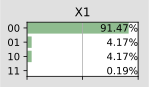

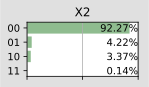

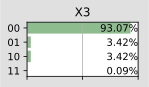

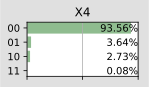

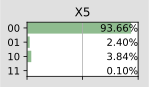

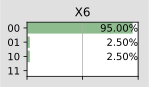

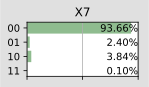

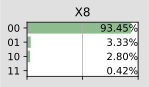

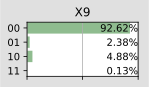

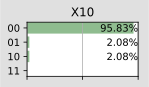

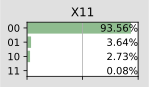

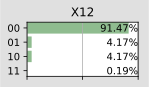

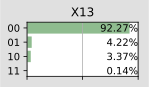

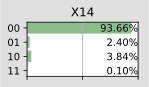

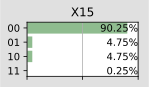

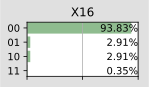

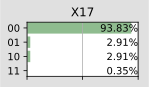

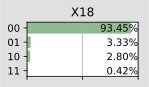

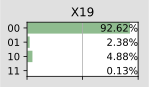

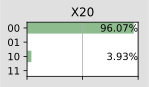

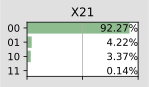

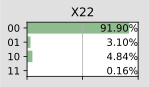

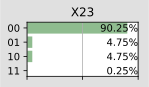

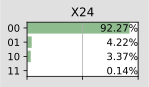

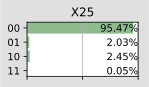

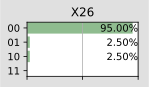

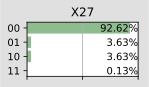

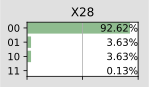

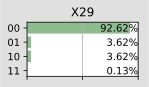

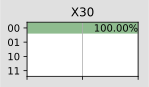

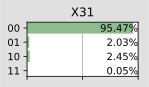

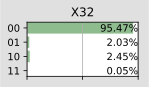

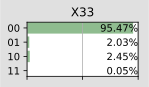

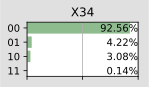

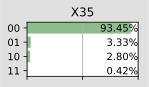

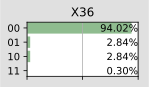

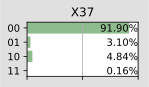

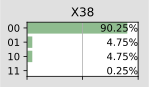

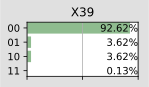

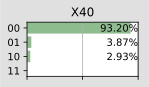

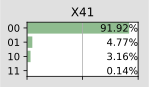

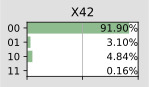

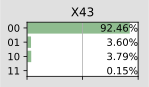

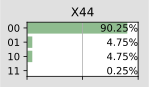

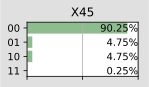

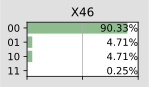

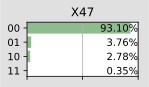

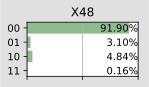

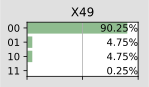

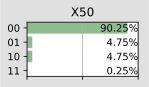

In [15]:
for i in ped.get_pedigree().keys():
    pview.gnb.showProba(ie3.posterior(f"X{i}"))


In [16]:
bn_compact = pview.ped_to_bn_compact(ped,0.05)
ie4 = pview.gum.LazyPropagation(bn_no)
ie4.setEvidence(new_evidence)
ie4.makeInference()

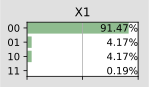

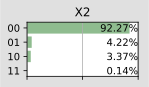

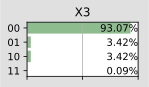

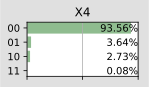

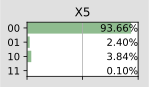

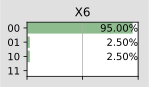

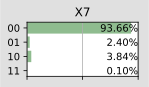

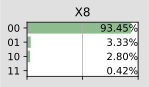

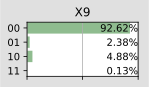

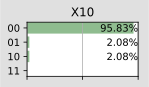

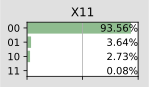

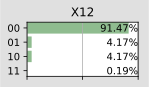

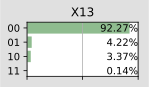

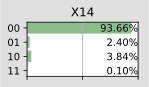

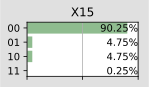

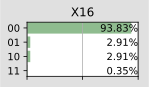

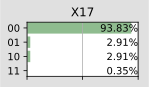

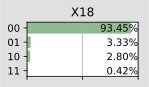

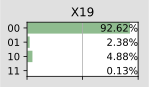

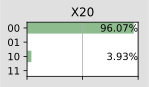

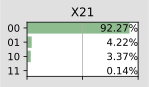

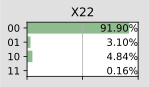

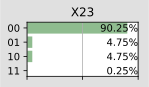

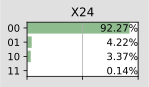

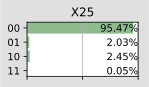

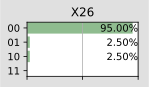

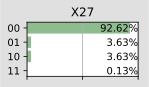

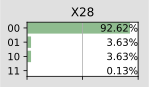

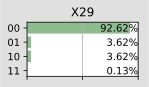

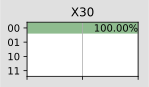

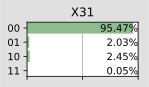

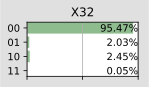

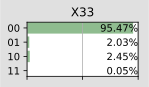

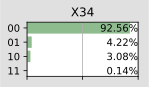

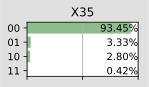

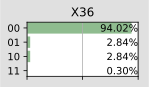

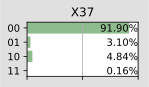

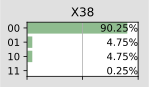

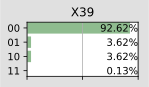

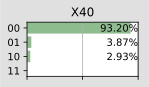

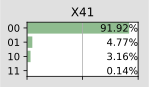

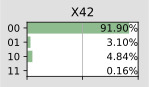

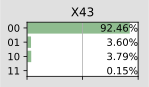

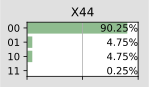

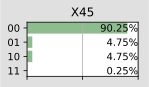

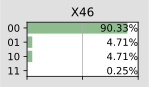

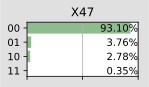

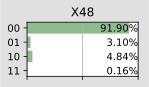

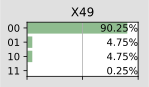

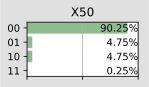

In [17]:
for i in ped.get_pedigree().keys():
    pview.gnb.showProba(ie4.posterior(f"X{i}"))

In [18]:
pview.gum.ExactBNdistance(bn_no,bn_compact)

OperationNotAllowed: [pyAgrum] Operation not allowed: BNdistance : the 2 BNs are not compatible (not the same vars : Sfat2)

In [1]:
import random
import sandbox.doLazyProg as laz

p = 800
g = 4
nbChild = random.randint(6,12)
cl = 3
nb = 1
ped = Pedigree()
ped.gen_ped(nb, p, g, nbChild, cl, 0.03)
test_bn = pview.ped_to_bn_compact(ped,f)
pview.save_bn(test_bn,f'../bn_compact_{p}_{g}_{nbChild}_{cl}_G{nb}')
laz.doLazyProg(f'../bn_compact_{p}_{g}_{nbChild}_{cl}_G{nb}.bif')


NameError: name 'Pedigree' is not defined

In [ ]:
pview.max_clique_size(test_bn)


In [6]:
ped_senegal = Pedigree()
print(len(ped_senegal.get_pedigree()))
ped_senegal.load('../data/ped/senegal2013.ped')
bn_senegal = pview.ped_to_bn(ped_senegal,0.05)
pview.max_clique_size(bn_senegal)

0


16

In [21]:
stats = ped_senegal.get_stat_family()



In [22]:
max(stats)

'N990914'

In [23]:
import operator
max(stats.items(), key=operator.itemgetter(1))[0]

'D1'

In [24]:
stats['D1']

714

In [7]:
print(ped.mean_weading())
print(ped_senegal.mean_weading())


AttributeError: 'Pedigree' object has no attribute 'mean_weading'